In [1]:
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ', apps['App'].count())
n=5
apps.sample(n)

Total number of apps in the dataset =  9659


Unnamed: 0                                                App  \
8172        9292                                          Agenda EF   
641          772                           play2prep: ACT, SAT prep   
6897        7959  Free Professional Resume Builder, CV, Cover Le...   
7127        8200                                         DB Browser   
7691        8808                             MegaNDS (NDS Emulator)   

       Category  Rating  Reviews   Size  Installs  Type Price Content Rating  \
8172     FAMILY     3.4       79    33M    5,000+  Free     0       Everyone   
641   EDUCATION     4.2     3692   4.4M  100,000+  Free     0       Everyone   
6897   BUSINESS     4.2      831    11M   50,000+  Free     0       Everyone   
7127      TOOLS     3.3      236  0.221   50,000+  Free     0       Everyone   
7691       GAME     3.4     2218    11M  500,000+  Free     0       Everyone   

         Genres        Last Updated Current Ver   Android Ver  
8172  Education        May 27, 2015        1.03    3.0 and up  
641   Education       July 23, 2015       4.1.3  2.3.3 and up  
6897   Business       June 13, 2018     1.3.2.9    4.0 and up  
7127      Tools  September 20, 2011         1.6    2.1 and up  
7691     Arcade    October 18, 2017         2.0    4.0 and up

In [2]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col])

Number of categories =  33


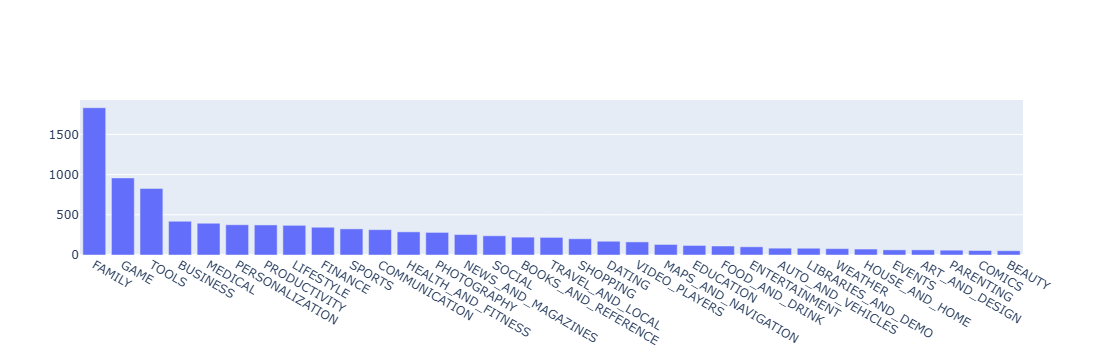

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]
plotly.offline.iplot(data)

Average app rating =  4.173243045387994


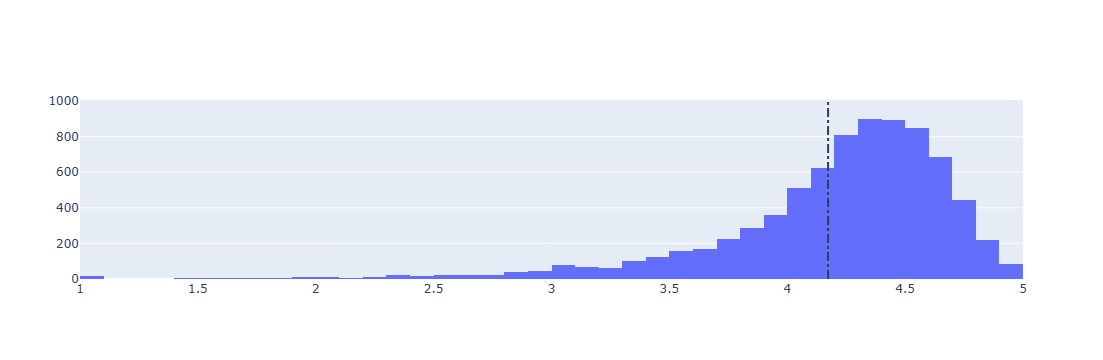

In [4]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }
plotly.offline.iplot({'data': data, 'layout': layout})

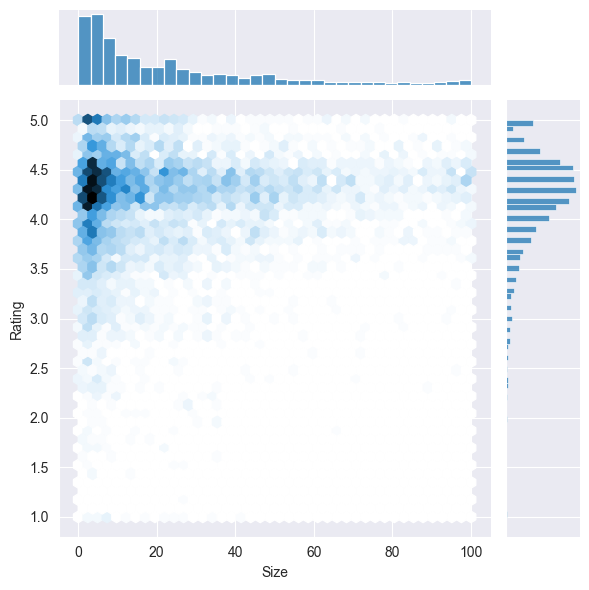

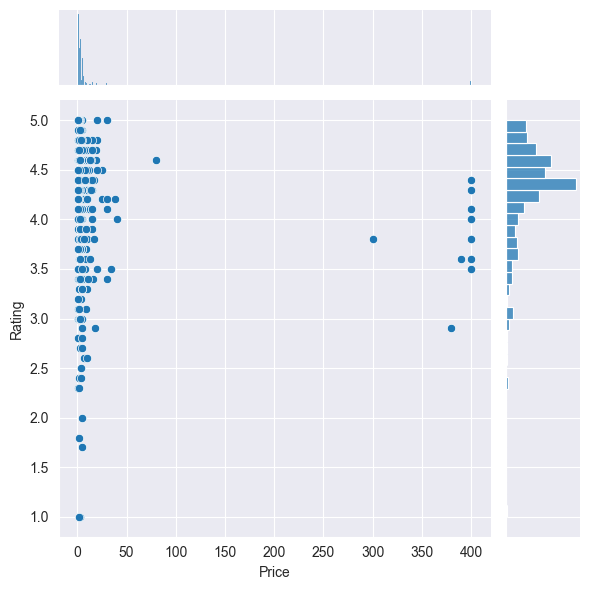

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')
paid_apps = apps[apps['Type'] == 'Paid']
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         ðŸ’Ž I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/Ø£Ù†Ø§ ØºÙ†ÙŠ/æˆ‘å¾ˆæœ‰éŒ¢  399.99

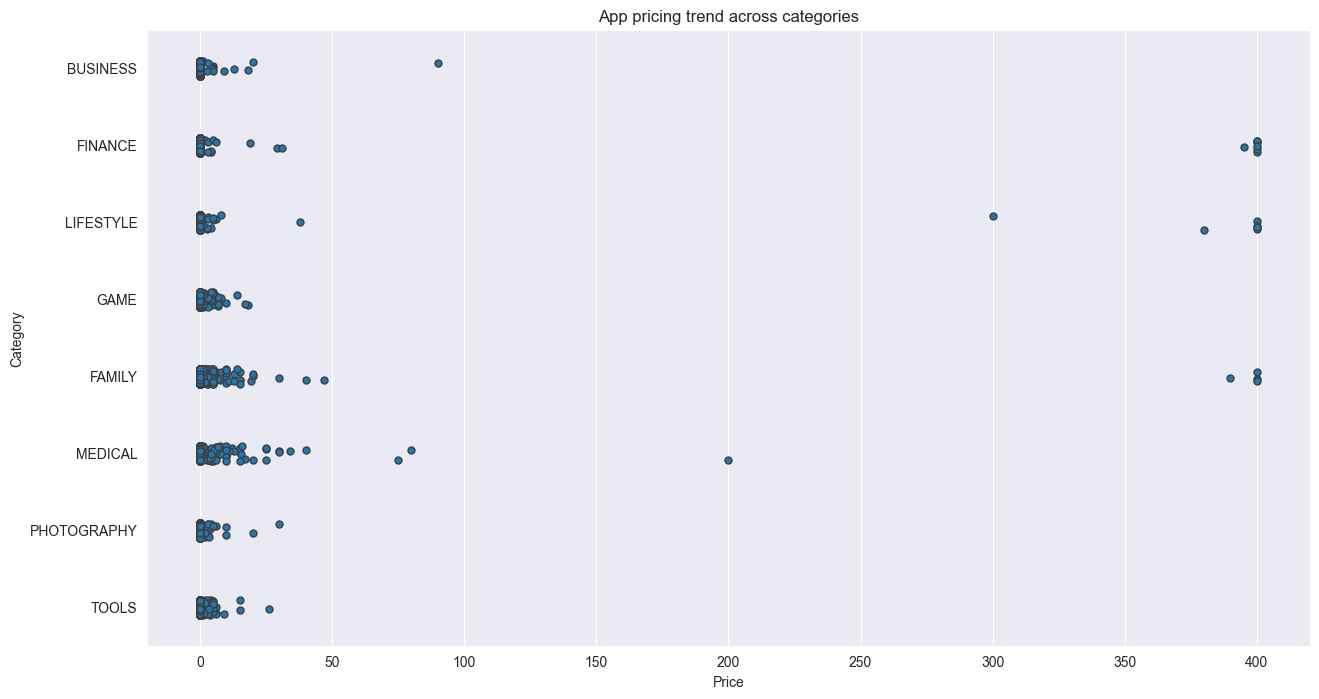

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

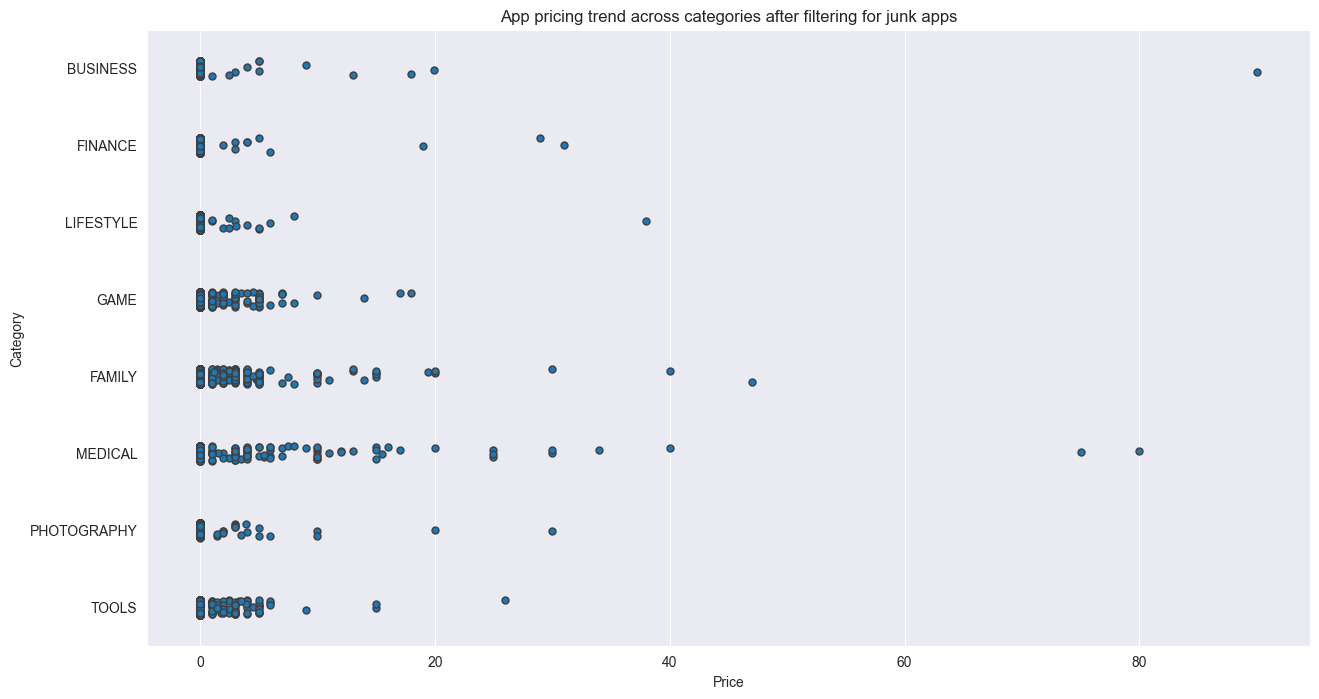

In [7]:
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

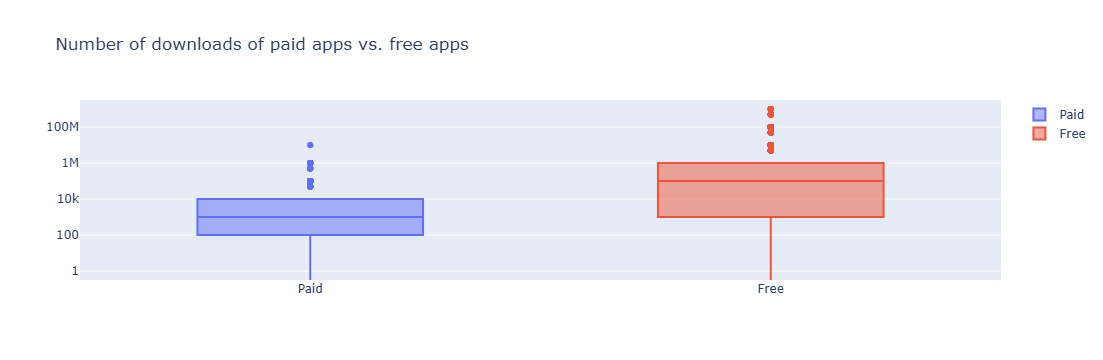

In [8]:
trace0 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

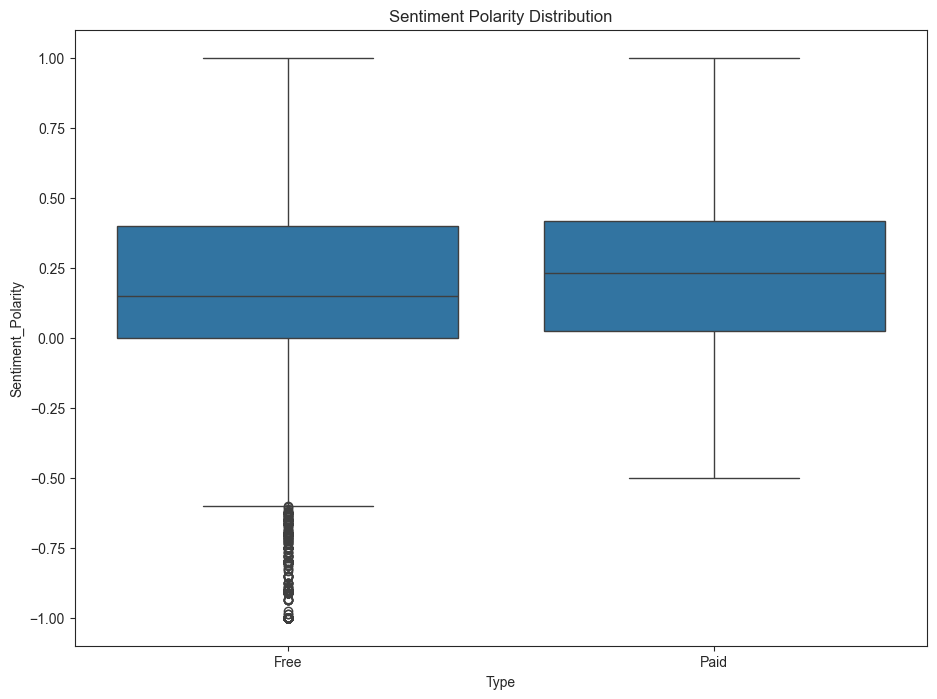

In [9]:
reviews_df = pd.read_csv('user_reviews.csv')
merged_df = pd.merge(apps, reviews_df, on='App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')